In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('D:/Clean_Dataset.csv')

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [139]:
col = ['airline', 'source_city',
       'stops', 'arrival_time', 'destination_city', 'class']
for i in col:
    print (df[i].value_counts())
    print ('***************************')
    print ('                       ')

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
***************************
                       
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
***************************
                       
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
***************************
                       
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
***************************
                       
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64
***************************
                       
cl

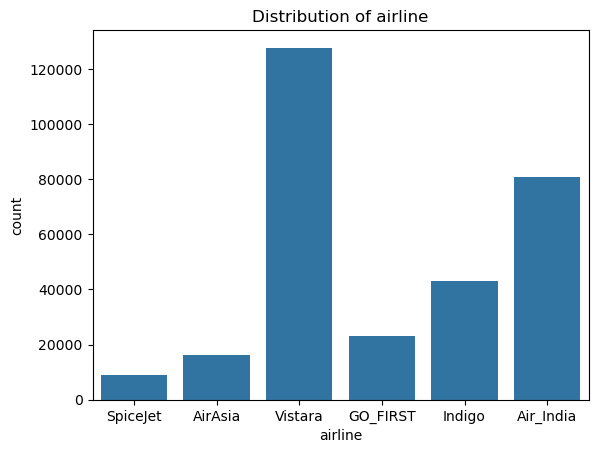

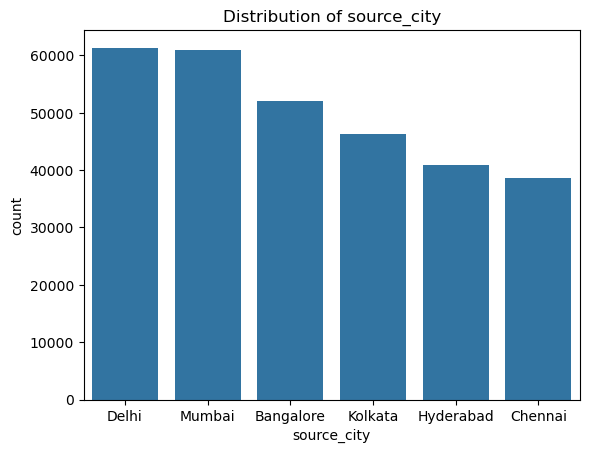

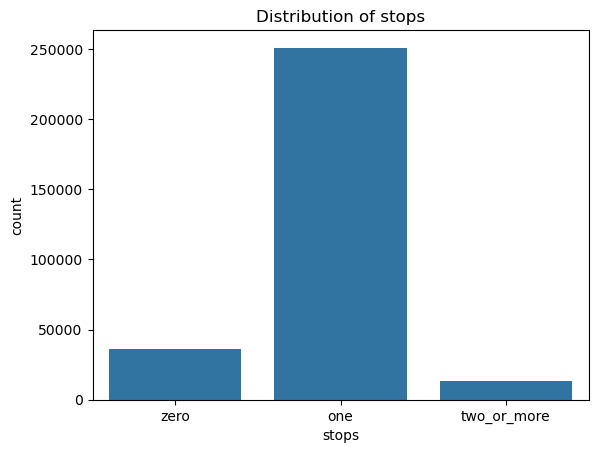

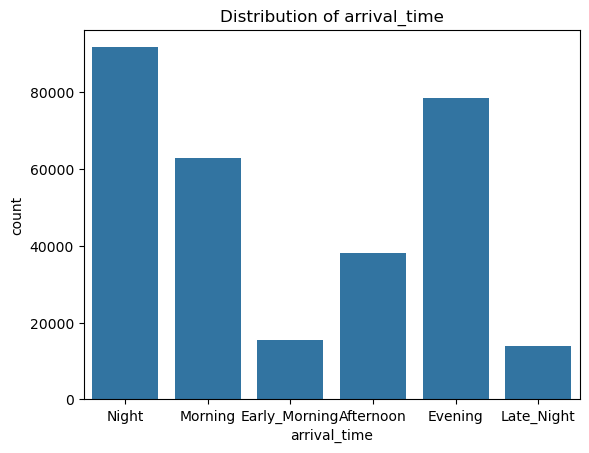

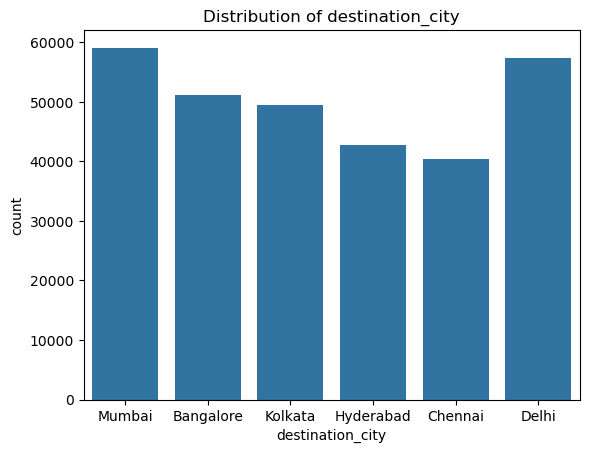

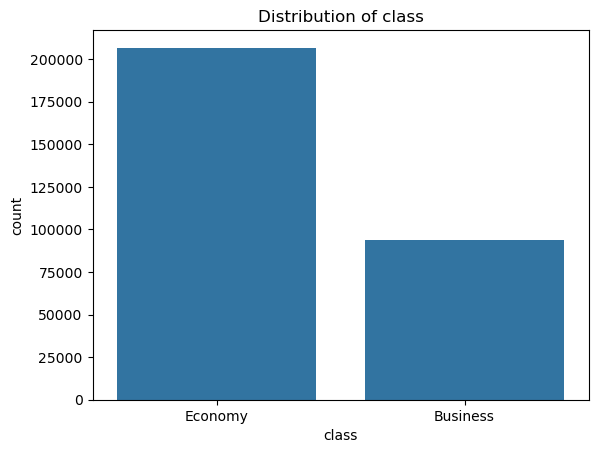

In [142]:
for i in col:
    sns.countplot(data=df, x=i)
    plt.title(f"Distribution of {i}")
    plt.show()

In [144]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [146]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

<Axes: xlabel='days_left', ylabel='price'>

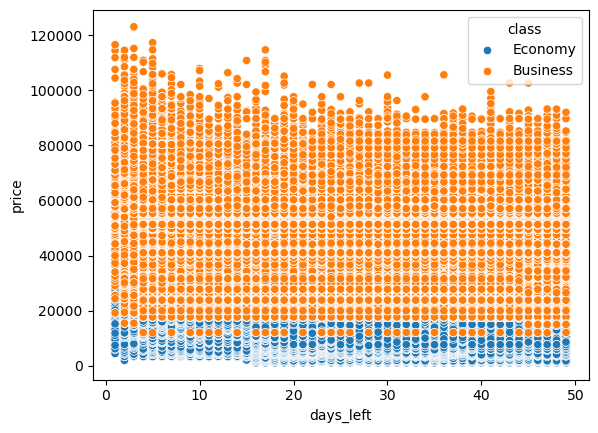

In [158]:
sns.scatterplot(data=df, x='days_left', y='price', hue='class')

In [160]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: ylabel='price'>

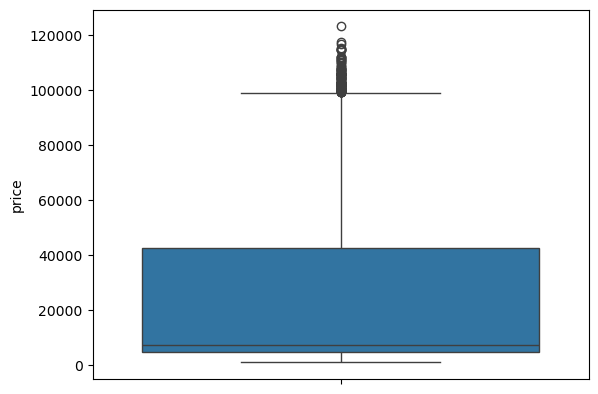

In [176]:
sns.boxplot(df['price'])

In [164]:
d1 = df[df['price'] >= 15000]

In [170]:
d1['class'].value_counts()

class
Business    93422
Economy      7701
Name: count, dtype: int64

In [174]:
d1['airline'].value_counts()

airline
Vistara      64530
Air_India    35108
Indigo         890
GO_FIRST       206
SpiceJet       196
AirAsia        193
Name: count, dtype: int64

In [180]:
d1['arrival_time'].value_counts()

arrival_time
Night            31615
Evening          29086
Morning          23000
Afternoon        11853
Early_Morning     3583
Late_Night        1986
Name: count, dtype: int64

In [184]:
d1['stops'].value_counts()

stops
one            90397
zero            8128
two_or_more     2598
Name: count, dtype: int64

In [190]:
df[df['price'] >= 115000]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215859,215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216096,216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307
261377,261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.50,3,123071
277345,277345,Vistara,UK-870,Hyderabad,Night,one,Afternoon,Mumbai,Business,16.42,3,115211


In [204]:
df[df['class'] == 'Business']['airline'].value_counts()

airline
Vistara      60589
Air_India    32898
Name: count, dtype: int64

In [206]:
df[df['class'] == 'Economy']['airline'].value_counts()

airline
Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: count, dtype: int64

In [202]:
df[df['price'] == 1105]['airline'].value_counts()z

airline
Indigo      236
AirAsia      32
GO_FIRST     32
Name: count, dtype: int64

# Feature Engeenering

In [214]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [216]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [11]:
# I gonna merge 'morning' and 'early_morning'. and 'night' and 'late naight'

def merge_time (time):
    if time in ['Morning', 'Early_Morning']:
        return 'Morning'
    
    elif time in ['Night', 'Late_Night']:
        return 'Night'

    else:
        return time

df['dep_time'] = df['departure_time'].apply(merge_time)
df['arr_time']  = df['arrival_time'] .apply(merge_time)

In [13]:
df['dep_time'].value_counts()

dep_time
Morning      137936
Evening       65102
Night         49321
Afternoon     47794
Name: count, dtype: int64

In [15]:
df[df.duplicated()]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dep_time,arr_time


# Encoding

In [250]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dep_time,arr_time
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Evening,Night
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Morning,Morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Morning,Morning
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Morning,Afternoon
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Morning,Morning


In [19]:
oe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
le = LabelEncoder()

In [21]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'dep_time', 'arr_time'],
      dtype='object')

In [23]:
ec = ['airline', 'source_city', 'destination_city','dep_time', 'arr_time']

for col in ec:
    dum = oe.fit_transform(df[[col]])
    df = pd.concat([df, dum], axis=1)

In [25]:
l_c = ['stops', 'class']

for i in l_c:
    df[i] = le.fit_transform(df[i])
    

In [27]:
df['class'].value_counts()

class
1    206666
0     93487
Name: count, dtype: int64

In [29]:
df['stops'].value_counts()

stops
0    250863
2     36004
1     13286
Name: count, dtype: int64

In [49]:
df_e = df.drop(['airline', 'source_city', 'destination_city','dep_time', 'arr_time','arrival_time','Unnamed: 0', 'flight', 'departure_time','duration', 'days_left' ], axis=1)

In [51]:
df_e.columns

Index(['stops', 'class', 'price', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Bangalore',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'dep_time_Afternoon', 'dep_time_Evening',
       'dep_time_Morning', 'dep_time_Night', 'arr_time_Afternoon',
       'arr_time_Evening', 'arr_time_Morning', 'arr_time_Night'],
      dtype='object')

In [35]:
df_e

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,destination_city_Kolkata,destination_city_Mumbai,dep_time_Afternoon,dep_time_Evening,dep_time_Morning,dep_time_Night,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night
0,2,1,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,1,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2,1,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,1,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,10.08,49,69265,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
300149,0,0,10.42,49,77105,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300150,0,0,13.83,49,79099,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300151,0,0,10.00,49,81585,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_e.info()

In [37]:
df_e.corr()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,destination_city_Kolkata,destination_city_Mumbai,dep_time_Afternoon,dep_time_Evening,dep_time_Morning,dep_time_Night,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night
stops,1.000000,0.100262,-0.473860,-0.007047,-0.202620,0.056402,-0.075445,0.004986,0.155739,0.069300,...,-0.034468,0.007443,-0.021068,0.031119,-0.017612,0.009878,0.014996,-0.065755,0.046278,0.007484
class,0.100262,1.000000,-0.138710,0.013039,-0.937860,0.160113,-0.124899,0.194540,0.275477,0.118325,...,0.012987,-0.010573,0.045954,-0.010789,0.007726,-0.043765,0.020499,-0.032833,-0.015712,0.030341
duration,-0.473860,-0.138710,1.000000,-0.039157,0.204222,-0.108547,0.277283,-0.139380,-0.365953,0.008776,...,0.061440,-0.043900,-0.088588,0.104017,-0.099961,0.106220,-0.043899,0.033094,0.119385,-0.109542
days_left,-0.007047,0.013039,-0.039157,1.000000,-0.091949,0.030377,-0.022721,0.030408,0.007839,-0.024414,...,-0.003840,-0.004337,0.005311,-0.010238,0.000037,0.006093,-0.001289,-0.013737,0.006810,0.007275
price,-0.202620,-0.937860,0.204222,-0.091949,1.000000,-0.176188,0.070041,-0.194179,-0.280882,-0.114019,...,0.020956,0.010533,-0.051968,0.007946,0.005320,0.035321,-0.040258,0.056408,-0.002259,-0.021724
airline_AirAsia,0.056402,0.160113,-0.108547,0.030377,-0.176188,1.000000,-0.144596,-0.068858,-0.097506,-0.041881,...,0.005273,-0.029994,0.020802,0.005935,-0.040293,0.027048,0.000289,-0.048446,0.004195,0.040500
airline_Air_India,-0.075445,-0.124899,0.277283,-0.022721,0.070041,-0.144596,1.000000,-0.175687,-0.248781,-0.106858,...,-0.006201,0.042490,-0.041138,0.019692,0.006944,0.009379,0.029252,-0.040356,0.049002,-0.028323
airline_GO_FIRST,0.004986,0.194540,-0.139380,0.030408,-0.194179,-0.068858,-0.175687,1.000000,-0.118471,-0.050886,...,-0.001016,0.026916,0.042714,-0.003699,-0.010775,-0.023571,0.016060,-0.043881,-0.016146,0.043996
airline_Indigo,0.155739,0.275477,-0.365953,0.007839,-0.280882,-0.097506,-0.248781,-0.118471,1.000000,-0.072057,...,0.033801,-0.031242,0.085382,-0.020572,-0.002685,-0.057814,0.053846,0.007335,-0.069726,0.019780
airline_SpiceJet,0.069300,0.118325,0.008776,-0.024414,-0.114019,-0.041881,-0.106858,-0.050886,-0.072057,1.000000,...,0.029817,-0.000058,-0.012904,0.003626,0.004152,0.003125,-0.017644,-0.042162,0.040030,0.014294


# Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [55]:
df_e['price'] = ss.fit_transform(df_e[['price']])

In [57]:
df_e.columns

Index(['stops', 'class', 'price', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Bangalore',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'dep_time_Afternoon', 'dep_time_Evening',
       'dep_time_Morning', 'dep_time_Night', 'arr_time_Afternoon',
       'arr_time_Evening', 'arr_time_Morning', 'arr_time_Night'],
      dtype='object')

In [59]:
X = df_e.drop('price', axis=1)
y = df_e['price']

# Model Selection

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(240122, 28)

In [69]:
xg = XGBRegressor(random_state=42)

In [71]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Try different step sizes
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [3, 4,5],  # Depth of the tree
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples for each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction to make a split
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3],  # L2 regularization
}

In [73]:

rc = RandomizedSearchCV(
    estimator = xg,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='neg_mean_squared_error',  # Use appropriate metric for regression
    cv=3,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
rc.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2, 3],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rc.best_score_

-0.04549352358116691

In [81]:
rc.best_params_

{'subsample': 1.0,
 'reg_lambda': 1.5,
 'reg_alpha': 0,
 'n_estimators': 150,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0}

# Model training on best Perameter

In [89]:
xg = XGBRegressor(
 subsample= 1.0,
 reg_lambd=1.5,
 reg_alpha= 0,
 n_estimators= 150,
 max_depth= 5,
 learning_rate=0.2,
 gamma= 0,
 random_state = 42
)

In [91]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [93]:
from sklearn.metrics import mean_squared_error

In [95]:
yp = xg.predict(X_test)

r2_score = r2_score(yp, y_test)
mse = mean_squared_error(yp, y_test)

print('R2_score: ', r2_score)
print ('mse: ', mse)

R2_score:  0.9510348323517931
mse:  0.046465854910882544
